In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
np.random.seed(42)

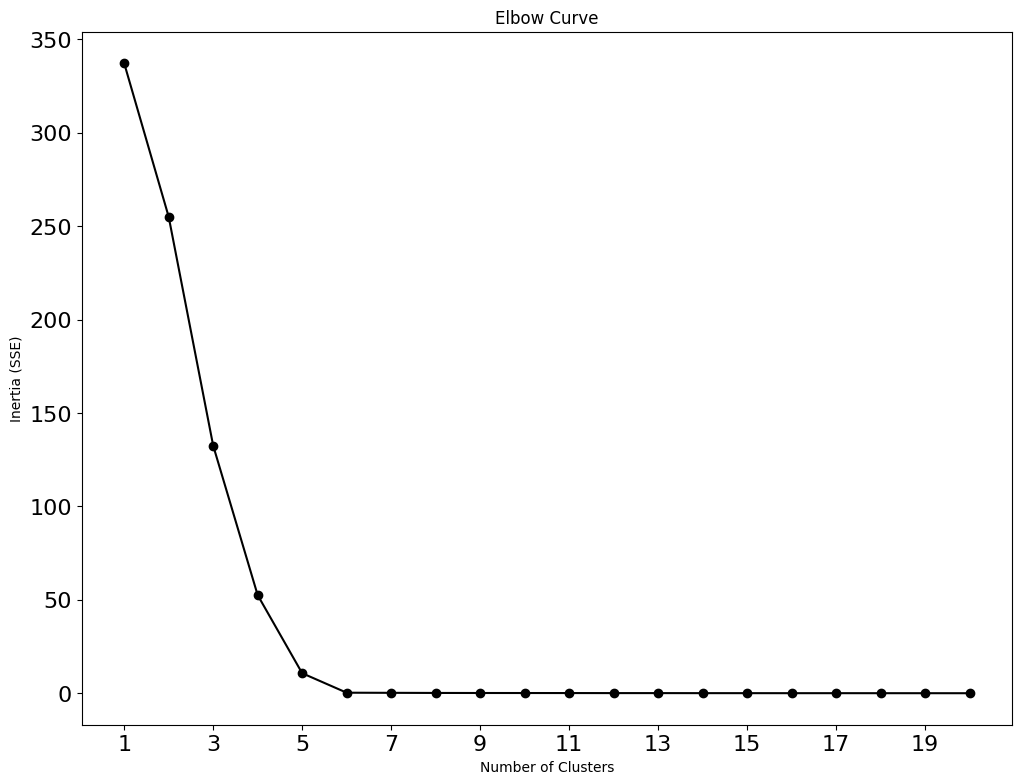

Cluster Summary:
          Quantum dot  Grahpene    Carbon       CNT  Mesoporous Carbon  \
Cluster                                                                 
0           0.000000  0.000000  0.000000  0.967573           0.000000   
1           0.000000  0.000000  0.968167  0.000000           0.000000   
2           0.000000  0.946722  0.000000  0.000000           0.000000   
3           0.000000  0.000000  0.000000  0.000000           0.000000   
4           0.160612  0.000000  0.000000  0.000000           0.791442   

         Carbon Foam  Pyridinic-N  Pyrrolic-N  Grapitic-N  Quaternary-N  \
Cluster                                                                   
0           0.000000     0.013745    0.005649    0.011295      0.001485   
1           0.000000     0.007064    0.006425    0.005563      0.003229   
2           0.000000     0.024578    0.012379    0.012569      0.000000   
3           0.958672     0.016457    0.013852    0.000000      0.005910   
4           0.000000

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data
AA = "C:/Users/ganes/onedrive/Desktop/AI/NCCO2R/NC-Final.xlsx"
X = pd.read_excel(AA, usecols='A:L') 
Y = pd.read_excel(AA, usecols='R')

# Step 3: Determine the optimal number of clusters using the elbow method
sse = []
for E in range(1, 21):
    kmeans = KMeans(n_clusters=E)
    kmeans.fit(X)
    sse.append([E, kmeans.inertia_])

# Plot the elbow curve
plt.figure(figsize=(12, 9))
plt.xticks(range(1, 21, 2))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.tick_params(labelsize=16)
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], "k", marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Curve')
plt.show()

# Step 4: Apply K-means clustering with the chosen number of clusters (e.g., 5)
n_clusters = 5  # Set this to the number of clusters determined from the elbow curve
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Add cluster labels to the DataFrame 'df'
df_k = pd.read_excel(AA, usecols='A:L')  # Load full dataset
df_k['Cluster'] = kmeans.fit_predict(X)

# Group by the 'Cluster' column in 'df'
cluster_summary = df_k.groupby('Cluster').mean()
print("Cluster Summary:\n", cluster_summary)


In [9]:
import pandas as pd

# Create a dictionary of the cluster summary data
data = {
    'Cluster': [0, 1, 2, 3, 4],
    'Quantum dot': [0.0, 0.0, 0.0, 0.0, 0.160612],
    'Graphene': [0.0, 0.0, 0.946722, 0.0, 0.0],
    'Carbon': [0.0, 0.968167, 0.0, 0.0, 0.0],
    'CNT': [0.967573, 0.0, 0.0, 0.0, 0.0],
    'Mesoporous Carbon': [0.0, 0.0, 0.0, 0.0, 0.791442],
    'Carbon Foam': [0.0, 0.0, 0.0, 0.958672, 0.0],
    'Pyridinic-N': [0.013745, 0.007064, 0.024578, 0.016457, 0.017764],
    'Pyrrolic-N': [0.005649, 0.006425, 0.012379, 0.013852, 0.009472],
    'Grapitic-N': [0.011295, 0.005563, 0.012569, 0.0, 0.016864],
    'Quaternary-N': [0.001485, 0.003229, 0.0, 0.00591, 0.0],
    'N-Oxide': [0.000246, 0.002319, 0.00379, 0.005109, 0.003845],
    'S': [0.0, 0.002915, 0.0, 0.0, 0.0]
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Set 'Cluster' as the index
df.set_index('Cluster', inplace=True)

# Export the DataFrame to an Excel file
df.to_excel('cluster_summary.xlsx')

print("Cluster summary exported successfully to 'cluster_summary.xlsx'")


Cluster summary exported successfully to 'cluster_summary.xlsx'


In [ ]:
#The table you've shared provides a summary of clustering results, where each row represents a cluster, and the columns represent different materials or features (like "Quantum dot," "Graphene," "Carbon," etc.). The values in each cell represent the proportion or importance of that material/feature within the corresponding cluster. Here’s an interpretation of these results:

General Overview:
Cluster Labels (0-4): These rows (Cluster 0, 1, 2, 3, and 4) indicate the different clusters formed, likely based on similarities between the materials/features.
Features: The columns represent specific materials (e.g., CNT, Carbon, Graphene) and chemical functionalities (e.g., Pyridinic-N, Pyrrolic-N, etc.).
Cluster Interpretation:
Cluster 0:

Dominated by Carbon Nanotubes (CNT) with a high value (0.967573), meaning that this cluster likely contains samples strongly associated with CNT.
Low representation of nitrogen functionalities (Pyridinic-N, Pyrrolic-N, etc.) and trace amounts of N-Oxide.
Other materials like Quantum dots, Graphene, and Carbon are absent from this cluster.
Cluster 1:

Mainly associated with Carbon (0.968167).
Small contributions from nitrogen functionalities (Pyridinic-N, Pyrrolic-N) and N-Oxide (0.002319).
There is no significant presence of CNT, Graphene, or Mesoporous Carbon.
Cluster 2:

Primarily characterized by Graphene (0.946722).
Moderate nitrogen functionality, particularly Pyridinic-N (0.024578) and N-Oxide (0.003790).
No significant presence of other materials like CNT or Mesoporous Carbon.
Cluster 3:

Dominated by Carbon Foam (0.958672).
Noticeable presence of nitrogen functionalities like Pyrrolic-N (0.013852) and N-Oxide (0.005109).
This cluster is unique due to its high association with Carbon Foam and the absence of Graphene, Carbon, and CNT.
Cluster 4:

Represents a mixture with some contribution from Quantum dot (0.160612) and Mesoporous Carbon (0.791442).
Contains moderate amounts of nitrogen functionalities (Pyrrolic-N: 0.009472, Grapitic-N: 0.016864).
This cluster is differentiated by the presence of both Quantum dots and Mesoporous Carbon, which is absent in the other clusters.
Key Takeaways:
Cluster 0: Strongly linked to Carbon Nanotubes (CNT).
Cluster 1: Mostly associated with Carbon.
Cluster 2: Primarily dominated by Graphene.
Cluster 3: Contains mostly Carbon Foam.
Cluster 4: A mixed cluster with Quantum dots and Mesoporous Carbon, plus notable nitrogen functionalities.
This clustering suggests that your data has been grouped into distinct categories based on the dominance of certain materials and
    their associated chemical functionalities. Each cluster represents a group of samples that share a common composition profile.#

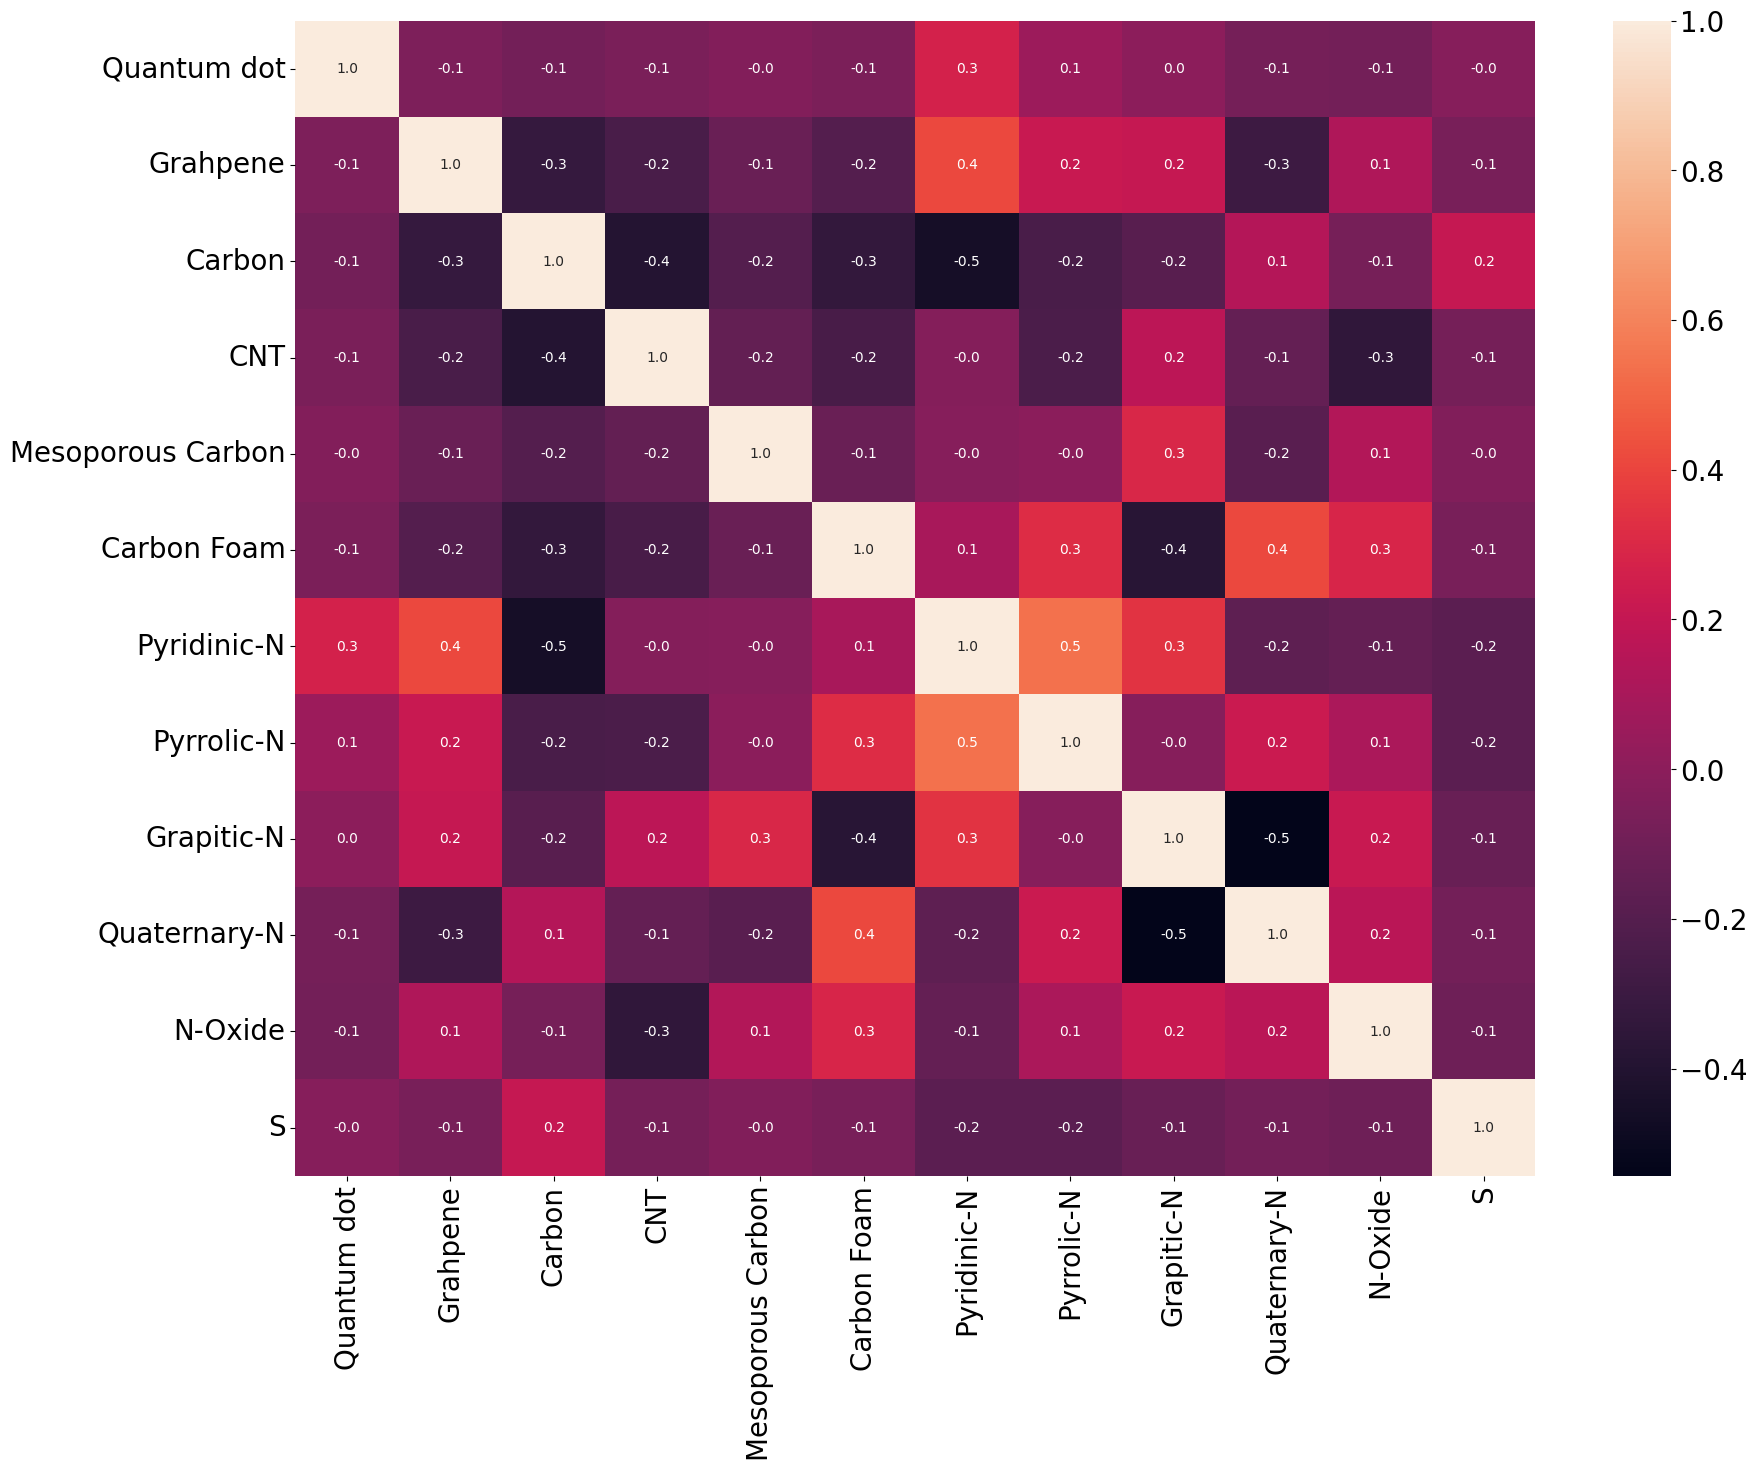

In [7]:
corr=X.corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(corr,annot=True, annot_kws={'size': 10}, fmt=".1f")
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

C:\Users\ganes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


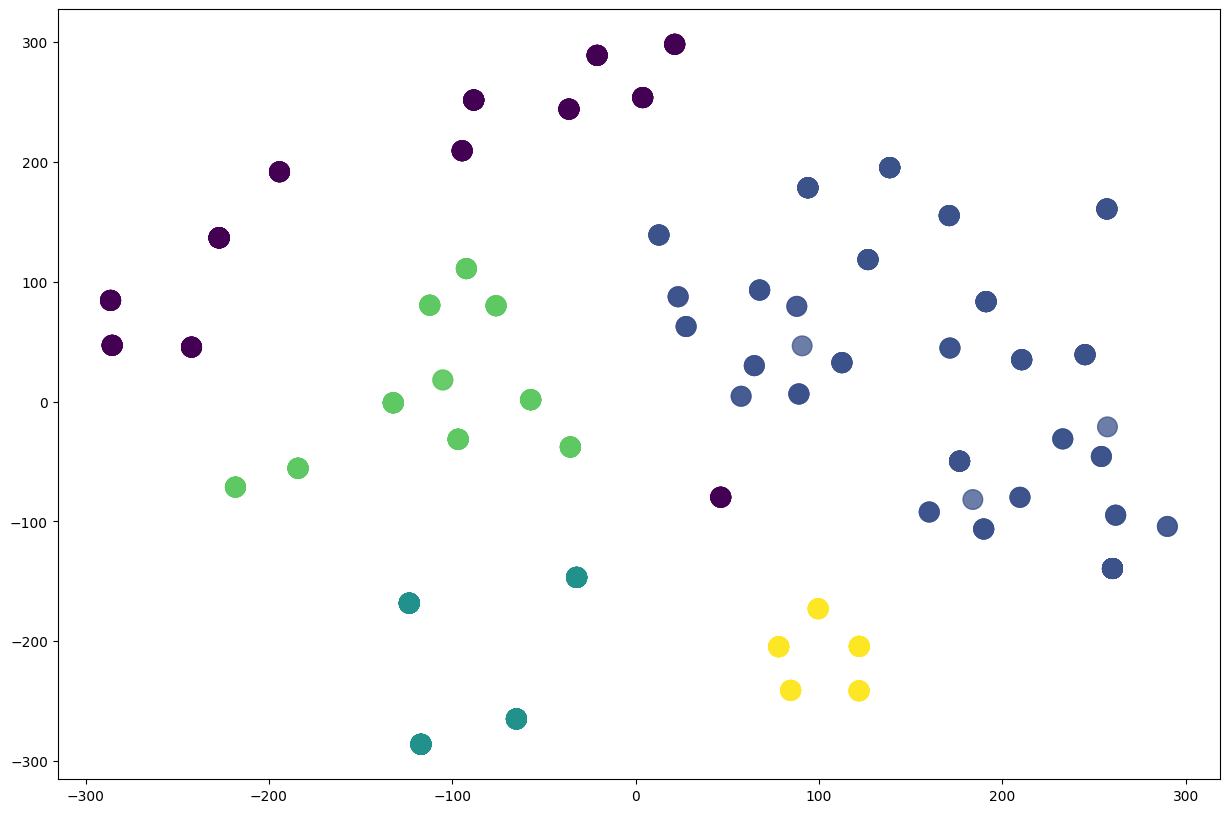

In [8]:
cluster = KMeans(n_clusters=5)
cluster.fit(X)
cluster_predictions = cluster.predict(X)
tsne = TSNE(n_components=2, random_state=1, n_iter=1000, perplexity=40, init="pca", learning_rate="auto")
tsne_EP = tsne.fit_transform(X)
plt.figure(figsize=(15,10))
plot2 = plt.scatter(x=tsne_EP[:,0], y=tsne_EP[:,1], c=cluster_predictions, s=200, alpha=0.75)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.show()